# ドル円 為替レート 15分足

### 一つ上のディレクトリをパスに追加

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [3]:
code = "USDJPY=X"
symbol = code
ticker = yf.Ticker(symbol)
# 長めにデータを取得しておく
df = ticker.history(period='2d', interval='15m')
# タイムゾーンを日本時間に変換
df.index = df.index.tz_convert('Asia/Tokyo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-27 08:00:00+09:00,144.570007,144.585999,144.496994,144.500000,0,0.0,0.0
2025-06-27 08:15:00+09:00,144.503006,144.505997,144.388000,144.410995,0,0.0,0.0
2025-06-27 08:30:00+09:00,144.414001,144.679001,144.414001,144.488007,0,0.0,0.0
2025-06-27 08:45:00+09:00,144.488007,144.742996,144.470001,144.679001,0,0.0,0.0
2025-06-27 09:00:00+09:00,144.675995,144.755005,144.542999,144.561996,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-30 13:30:00+09:00,144.121002,144.123993,143.998993,144.026001,0,0.0,0.0
2025-06-30 13:45:00+09:00,144.024994,144.039993,143.906998,143.944000,0,0.0,0.0
2025-06-30 14:00:00+09:00,143.944000,143.947998,143.841003,143.893005,0,0.0,0.0


## 時間帯を固定

In [4]:
# 現在時刻から、本日の日付を使用する
dt = datetime.datetime.now()
# ザラ場の取引時間に固定する
dt_start = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 09:00:00+09:00")
dt_end = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 15:30:00+09:00")
df0 = df[(dt_start <= df.index) & (df.index <= dt_end)]
dt_first = df0.index[0]
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-30 09:00:00+09:00,144.498993,144.602997,144.468994,144.572998,0,0.0,0.0
2025-06-30 09:15:00+09:00,144.574997,144.619003,144.514008,144.529007,0,0.0,0.0
2025-06-30 09:30:00+09:00,144.531998,144.623001,144.511993,144.574997,0,0.0,0.0
2025-06-30 09:45:00+09:00,144.572006,144.761993,144.539993,144.615997,0,0.0,0.0
2025-06-30 10:00:00+09:00,144.615997,144.651993,144.548004,144.606995,0,0.0,0.0
2025-06-30 10:15:00+09:00,144.610001,144.632996,144.360001,144.380997,0,0.0,0.0
2025-06-30 10:30:00+09:00,144.376999,144.423004,144.259995,144.287994,0,0.0,0.0
2025-06-30 10:45:00+09:00,144.287994,144.341003,144.240997,144.328003,0,0.0,0.0
2025-06-30 11:00:00+09:00,144.326004,144.330994,144.125000,144.154999,0,0.0,0.0


## ローソク足チャート（小さいサイズ）

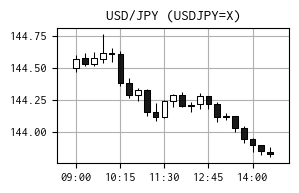

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df0,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()